In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# chage the default style of the plots
sns.set_style('darkgrid')


The dataset for this competition (both train and test) was generated from a deep learning model trained on a portion of the Multi-label Classification of enzyme substrates. This dataset only uses a subset of features from the original (the features that had the most signal). Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: For this challenge, you are given 6 features in the training data, but only asked to predict the first two features (EC1 and EC2).

In [73]:
train_df = pd.read_csv('Data/train.csv', index_col='id')
test_df = pd.read_csv('Data/test.csv', index_col='id')
sample_submission = pd.read_csv('Data/sample_submission.csv', index_col='id')

In [74]:
# so we can drop EC3 - EC6
train_df.drop(['EC3', 'EC4', 'EC5', 'EC6'], axis=1, inplace=True)

train_df.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0


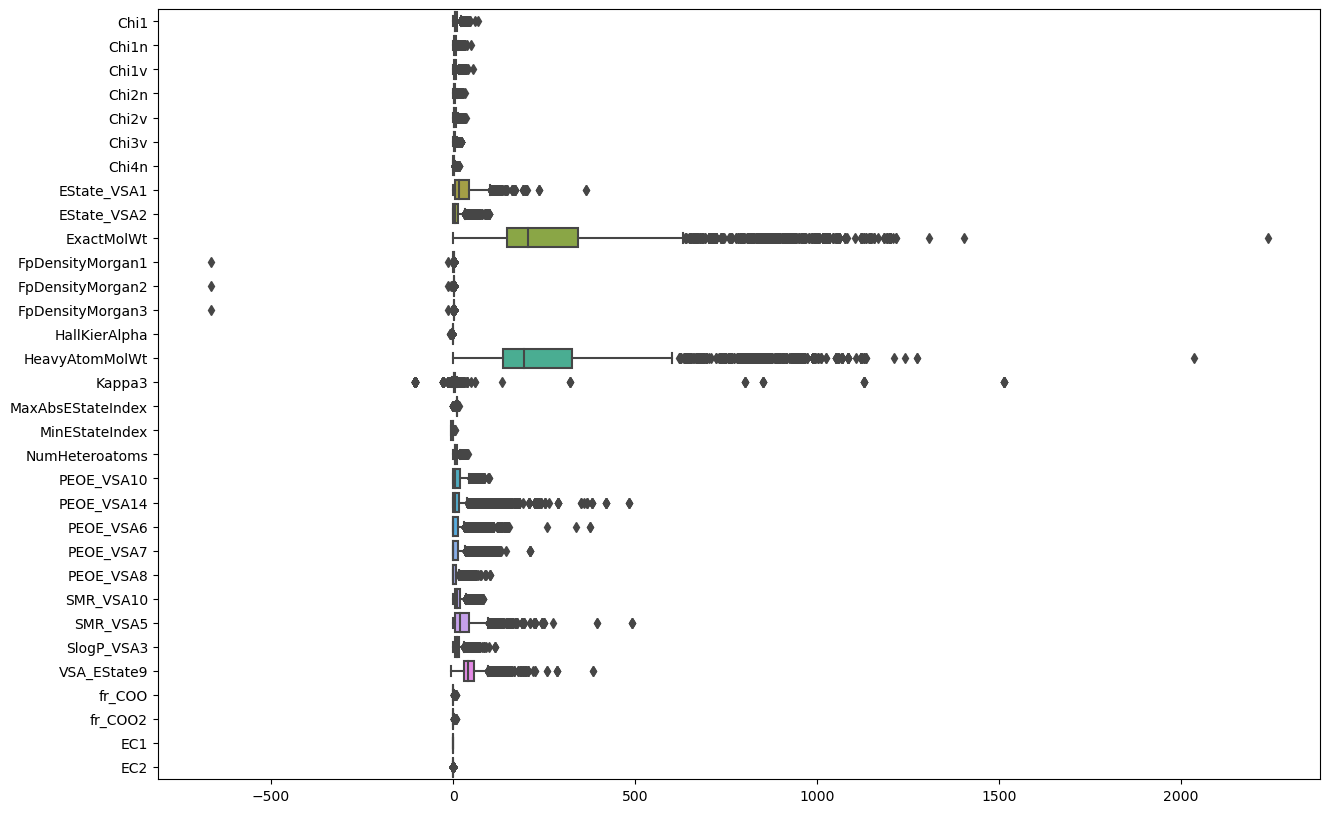

In [32]:
# Let's make a boxplot of all the features but we will drop the
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.drop(['BertzCT'], axis=1), orient='h')
plt.show()


In [193]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_df)

(-20.0, 20.0)

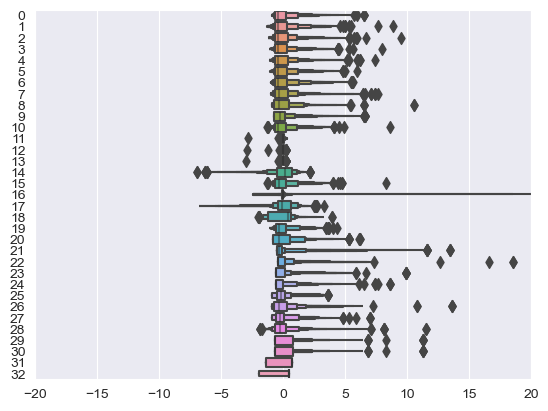

In [194]:
sns.boxenplot(data=scaled_train, orient='h')

plt.xlim(-20, 20)

In [205]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

# Fit on training set only.
scaled_train = scaler.fit_transform(train_df)

# Instantiate PCA
n_components = 10
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(scaled_train)

# get explained variances
explained_variance = pca.explained_variance_ratio_
principle_components = pca.components_

# Calculate the cumulative sum of explained variance ratios
cumulative_variances = np.cumsum(explained_variance)

# Create a new data frame of the trained data with the principle components
pca_train_df = pd.DataFrame(data=train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

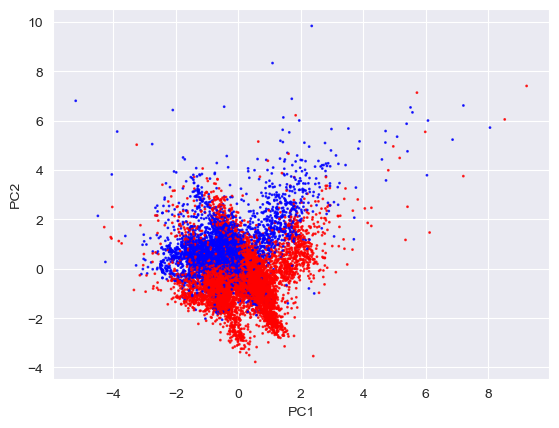

In [224]:
plt.scatter(train_pca[:, 7], train_pca[:, 4], marker='o', s=1, alpha=0.8, c=train_df['EC1'], cmap='bwr')

# plt.ylim(-1, 1)
# plt.xlim(-1, 1)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()



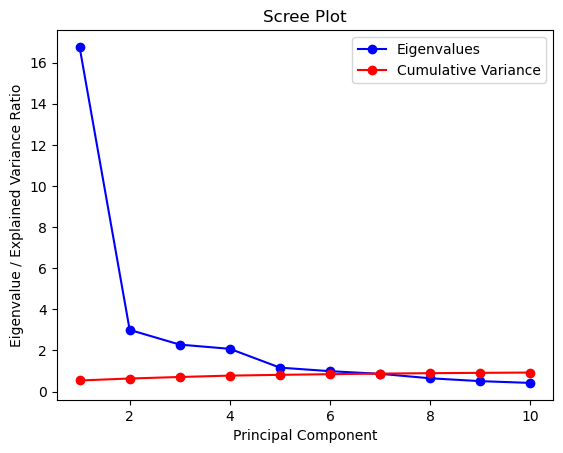

In [64]:
# Get the eigenvalues or explained variance ratios
eigenvalues = pca.explained_variance_
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variance ratios
cumulative_variances = np.cumsum(explained_variance_ratios)

# Plot the scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b', label='Eigenvalues')
plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances, marker='o', linestyle='-', color='r', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue / Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

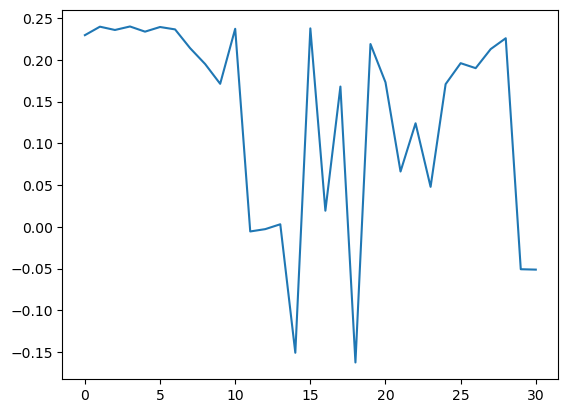

In [71]:
plt.plot(principle_components[0])

In [60]:
principle_components_df

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,0.229474,0.239630,0.235671,0.239875,0.233673,0.239239,0.236371,0.213917,0.195089,0.171148,...,0.047785,0.170727,0.195919,0.189993,0.212914,0.225839,-0.050646,-0.051111,-0.020427,-0.007873
1,0.001521,0.001752,0.004112,0.003177,0.005118,0.003859,0.005091,0.007997,-0.004020,-0.004579,...,0.011409,-0.004959,-0.009332,0.009681,-0.005986,-0.003960,-0.027814,-0.027930,0.005569,0.005733
2,0.021138,0.041722,0.108247,0.046584,0.122847,0.052539,0.082414,0.177616,-0.289059,0.095746,...,0.492763,0.065762,-0.150535,0.150648,-0.226073,-0.036103,-0.182436,-0.182478,0.202140,-0.033080
3,0.011811,-0.000142,0.008394,-0.015988,0.006587,-0.018629,-0.015438,-0.003692,-0.052180,0.131968,...,0.109132,0.150333,0.100015,-0.032308,-0.010116,0.071083,0.618231,0.617876,0.113633,-0.120862
4,-0.028754,0.031809,0.075688,0.024715,0.090743,0.026970,0.053166,0.150636,0.040745,-0.258884,...,0.245313,-0.342581,-0.198121,0.273119,-0.071652,0.064674,0.183160,0.182608,-0.454043,0.233078
5,-0.020991,0.006495,0.013103,0.016571,0.010502,0.013749,0.011452,0.015022,0.037144,-0.104115,...,-0.043041,-0.162354,0.005559,0.122296,0.042084,-0.001669,0.007543,0.008033,0.409697,-0.708111
6,0.000499,-0.008967,-0.013370,-0.000319,-0.018536,-0.003476,-0.014681,-0.038067,-0.037632,0.058263,...,-0.038311,0.062856,0.059911,-0.043720,0.011578,-0.029277,0.009990,0.012703,-0.002460,0.237092
7,0.036574,0.000725,-0.015084,-0.000560,-0.024422,-0.007112,-0.023321,-0.064956,-0.115856,0.270186,...,-0.158206,0.112086,0.186836,-0.076357,0.035014,-0.037229,-0.042505,-0.041972,0.320304,0.448012
8,-0.032646,0.019531,0.034370,0.028323,0.039165,0.032878,0.035457,0.044071,0.166513,-0.316899,...,-0.008362,-0.202573,-0.087636,0.175654,0.042245,0.044056,0.129227,0.129590,0.634847,0.408849
9,-0.037539,0.001265,0.004755,0.053227,-0.006302,0.047352,0.001531,-0.087990,-0.032826,0.054142,...,-0.246569,0.042341,0.231945,0.059053,0.114413,-0.089184,0.097477,0.098976,-0.240145,-0.047360
